# CS445 Final Project: Image Segmentation

## K-means clustering and Andy Warhol effect filter

##### In this project, we present you Image Segmentation using k-mean algorithm and altering the pixel values of the segmented image to create a cool Andy Warhol filter effect. The implementation was inspired by https://towardsdatascience.com/introduction-to-image-segmentation-with-k-means-clustering-83fd0a9e2fc3

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

In [2]:
def plot_3D_grouping(img, path):
    '''
    A helper function for plotting the 3D grouping of an img
    @params:
        img - the target image to be plotted
        path - where to save the plotted figure
    '''
    r, g, b = cv2.split(img)
    r = r.flatten()
    g = g.flatten()
    b = b.flatten()

    #plotting 
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(r, g, b)
    plt.savefig(path, dpi = 100)
    plt.show()
    

In [3]:
def plot_elbow(img, tries):
    '''
    A helper function that plots the SSD of segmentation with respect to K.
    @params:
        img - the img to be segmented
        tries - length of the x-axis
    '''
    x = np.arange(tries)
    x = x+1
    y = np.zeros((tries,))
    y[0] = np.inf
    # Run K-means with tries and assign the SSD to y
    for i in range(1, tries):
        _, ssd = kmean_wrapper(img, i, 10, False, False)
        y[i] = ssd
    
    plt.figure()
    plt.title("SSD Vs. K")
    plt.xlabel("K")
    plt.ylabel("SSD")
    plt.plot(x, y)
    plt.savefig("./output/SSD_vs_K.jpg")
    

In [4]:
def kmean_wrapper(img, K, attempts, effect, plot):
    '''
    A wrapper function for the cv2 k-mean algorithm
    @params:
        img - the img to be segmented
        K - number of groups to be segmented
        attempt - maximum number of attemps allowed for k-mean
        effect - boolean variable indicating whether to use 
                 Andy Warhol filter
        plot - boolean variable indicating whether to plot the images
    @return:
        result_image: the segmented image
        ret: the SSD of the segmentation
    '''
    # The actual k-means logic goes here!
    vectorized = img.reshape((-1,3))
    vectorized = np.float32(vectorized)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    # Set up variables for k-means call
    ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    
    # Get the segmented result and plot it
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    
    if plot == True:
        plt.figure()
        cv2.imwrite("./output/segmented_image.jpg", cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.imshow(result_image)
        plt.show()
        
    
    # Get the Andy Warhol result and plot it
    if effect == True:
        center = andy_warhol(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    
    if plot == True:
        plt.figure()
        cv2.imwrite("./output/andy_image.jpg", cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.imshow(result_image)
        plt.show()
    
    return result_image, ret

In [5]:
def andy_warhol(pixels):
    '''
    A helper function for creating Andy Warhol effect. Andy[] is an arry
    of pixel values - any excessive groupings will be wrapped around.
    '''
    Andy = [[240, 241, 72],
            [82, 128, 199],
            [250, 140, 130],
            [242, 58, 58],
            [119, 204, 98]]
    
    ret = pixels.copy()
    for i in range(ret.shape[0]):
        idx = i if i < 5 else i % 5
        ret[i] = Andy[idx]
    
    return ret


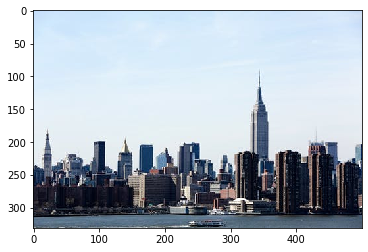

In [6]:
# Reads a target image and plot
img_file = './input/in7.jpg'
img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)

In [ ]:
# Plot the groupings of the original image
plot_3D_grouping(img, 'output/before-kmean-grouping.jpg')

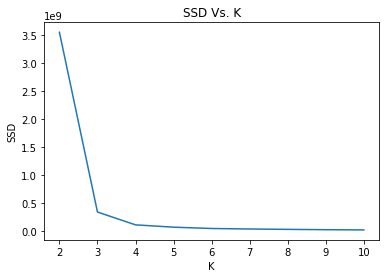

In [7]:
# Plot the "Elbow" of SSD vs K to find the optimal K
plot_elbow(img, 10)

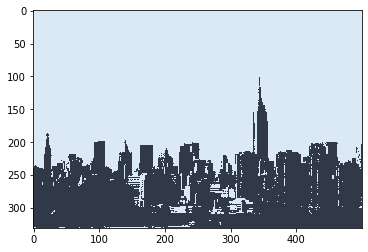

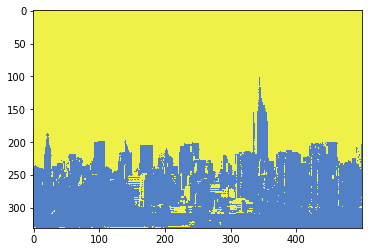

In [9]:
# Call kmean function and plot the result image
# Note: K here is obtained by picking the "elbow" in the above figure.
segmented_img, _ = kmean_wrapper(img, 3, 10, True, True)

In [ ]:
# Plot the groupings of result image
plot_3D_grouping(segmented_img, 'output/after-kmean-grouping.jpg')